In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn import metrics

In [4]:
boston = pd.read_csv('results.csv')
boston = boston.drop(['name', 'gender', 'bib', 'ctz', 'genderdiv', 'division',
                     'country', 'city', 'state'], axis=1)
boston = boston.dropna()
boston = boston[boston['10k'] != '-']
boston = boston[boston['25k'] != '-']
boston = boston[boston['35k'] != '-']
boston = boston[boston['30k'] != '-']
boston = boston[boston['5k'] != '-']
boston = boston[boston['20k'] != '-']
boston = boston[boston['40k'] != '-']
boston = boston[boston['half'] != '-']

FileNotFoundError: File b'results.csv' does not exist

In [5]:
boston.info()

NameError: name 'boston' is not defined

In [6]:
boston['10k'] = boston['10k'].astype('float64')
boston['25k'] = boston['25k'].astype('float64')
boston['35k'] = boston['30k'].astype('float64')
boston['30k'] = boston['30k'].astype('float64')
boston['5k'] = boston['30k'].astype('float64')
boston['20k'] = boston['30k'].astype('float64')
boston['40k'] = boston['30k'].astype('float64')
boston['half'] = boston['half'].astype('float64')
boston['pace'] = boston['pace'].astype('float64')
boston['official'] = boston['official'].astype('float64')
boston['overall'] = boston['overall'].astype('float64')

NameError: name 'boston' is not defined

In [7]:
scaler = StandardScaler()
scaler.fit(boston)
boston_n = pd.DataFrame(scaler.transform(boston), columns=boston.columns)

NameError: name 'boston' is not defined

In [8]:
boston_n.info()

NameError: name 'boston_n' is not defined

In [9]:
plt.scatter(boston_n['half'], boston_n['official'], c=boston_n['age'])

NameError: name 'boston_n' is not defined

In [41]:
boston_c = boston_n[['official', 'pace', 'age', 'half', '5k', '30k']]

In [42]:
boston_c.corr()

,official,pace,age,half,5k,30k
official,1.000000,0.999994,0.167319,0.956504,0.981220,0.981220
pace,0.999994,1.000000,0.167300,0.956508,0.981226,0.981226
age,0.167319,0.167300,1.000000,0.165972,0.157736,0.157736
half,0.956504,0.956508,0.165972,1.000000,0.987553,0.987553
5k,0.981220,0.981226,0.157736,0.987553,1.000000,1.000000
30k,0.981220,0.981226,0.157736,0.987553,1.000000,1.000000


In [43]:
pca = PCA(n_components=2)
pca.fit(boston_c)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.transform(boston_c)

array([[-7.10782343,  1.06452424],
       [-4.54592714, -0.41621155],
       [-7.35190361,  0.55369894],
       ...,
       [ 1.73230883, -2.06047957],
       [ 2.77594192, -0.64685432],
       [-0.13623591,  1.0436609 ]])

In [45]:
pca_df = pd.DataFrame(pca.transform(boston_c))

In [46]:
kmeans_model = KMeans(n_clusters=2, random_state=42).fit(pca_df)

In [ ]:
# metrics.silhouette_score(pca_df, kmeans_model.labels_, metric='euclidean')

In [ ]:
# consistency
#   visualize
#   statistics
# index score

Clusters:  2
Score:  9851.515548711064

Cross Sample Comparisons
------------------------
First Component
Means Deviation:    0.027918255562750776
Medians Deviation:  0.02747441112158567
Stds Deviation:     0.017317480576909357
Second Component
Means Deviation:    0.002991242948611894
Medians Deviation:  0.006516110826989231
Stds Deviation:     0.0027347860667546026

Clusters:  3
Score:  9254.409579592791

Cross Sample Comparisons
------------------------
First Component
Means Deviation:    0.021260749292074436
Medians Deviation:  0.03957105859495237
Stds Deviation:     0.0091311669071372
Second Component
Means Deviation:    0.008614669021481813
Medians Deviation:  0.014401201856349743
Stds Deviation:     0.004509826746331247

Clusters:  4
Score:  8339.421332734688

Cross Sample Comparisons
------------------------
First Component
Means Deviation:    0.013776602565745564
Medians Deviation:  0.011029010011356477
Stds Deviation:     0.012796841144969654
Second Component
Means Deviation: 

<Figure size 720x720 with 0 Axes>

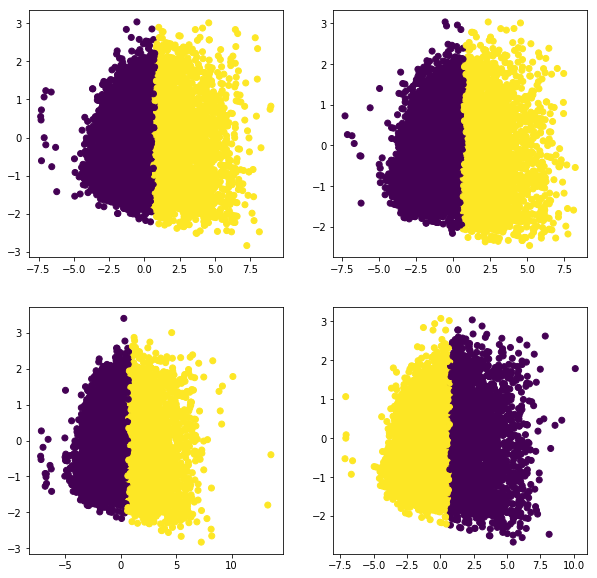

<Figure size 720x720 with 0 Axes>

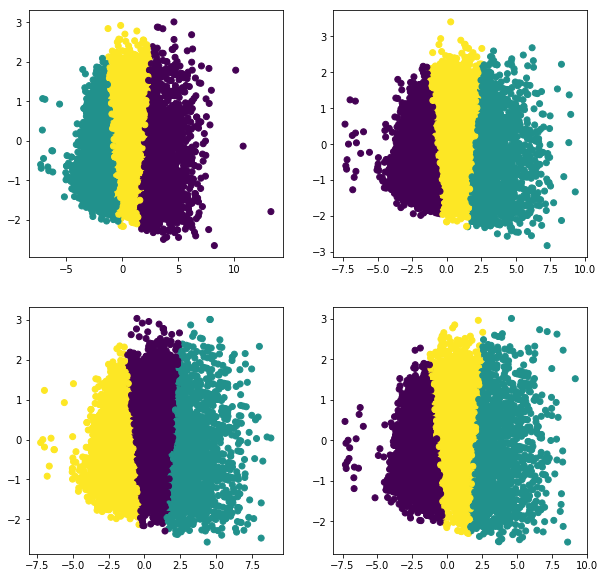

<Figure size 720x720 with 0 Axes>

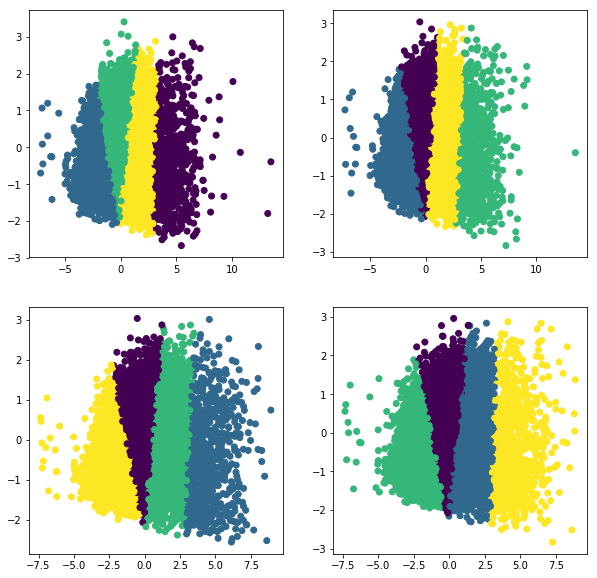

<Figure size 720x720 with 0 Axes>

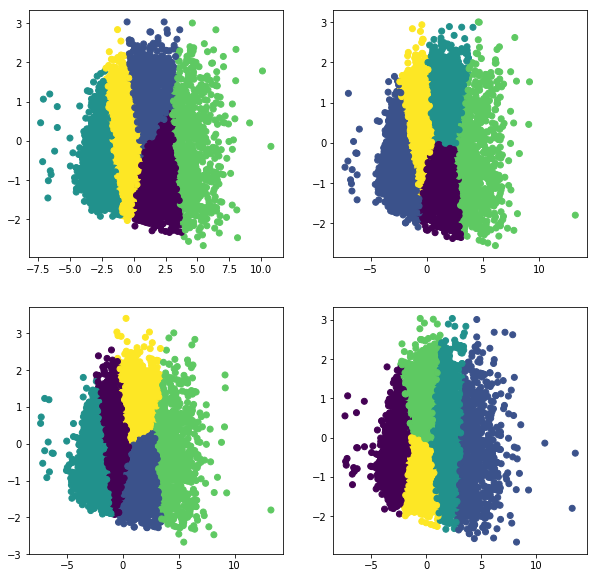

<Figure size 720x720 with 0 Axes>

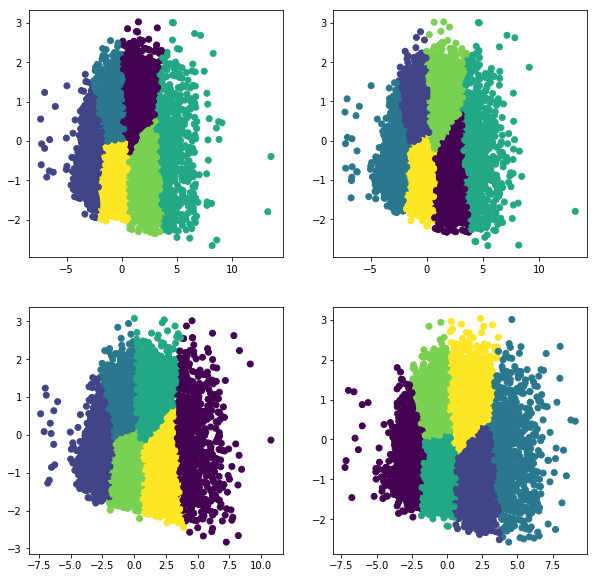

<Figure size 720x720 with 0 Axes>

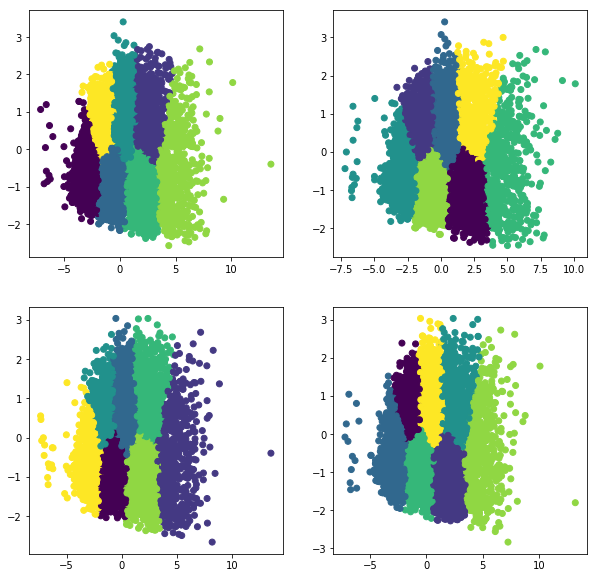

<Figure size 720x720 with 0 Axes>

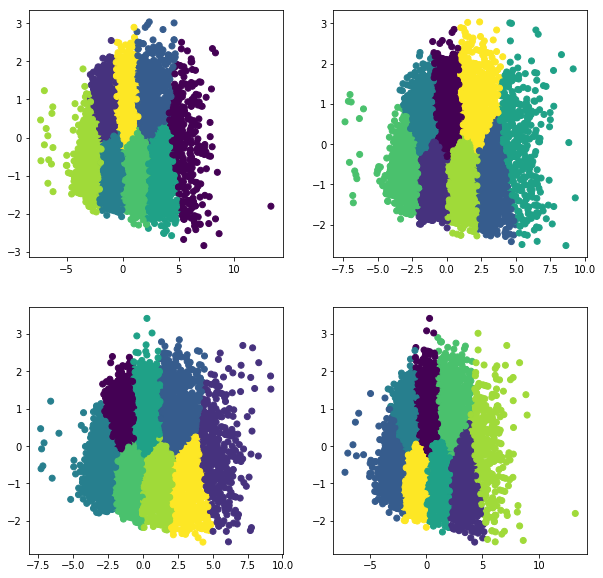

<Figure size 720x720 with 0 Axes>

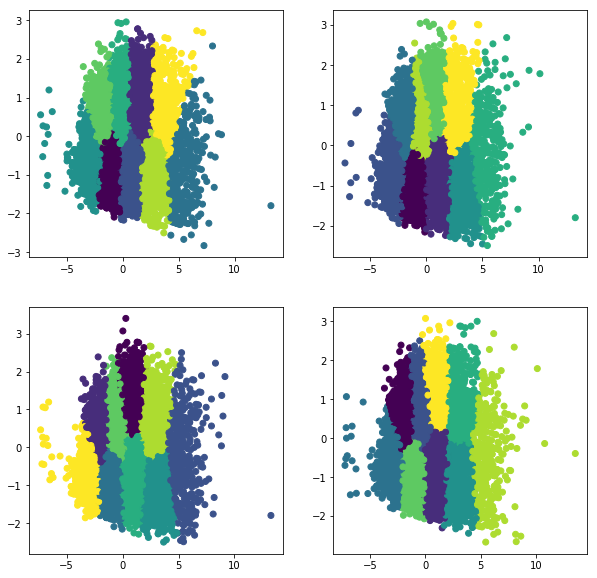

<Figure size 720x720 with 0 Axes>

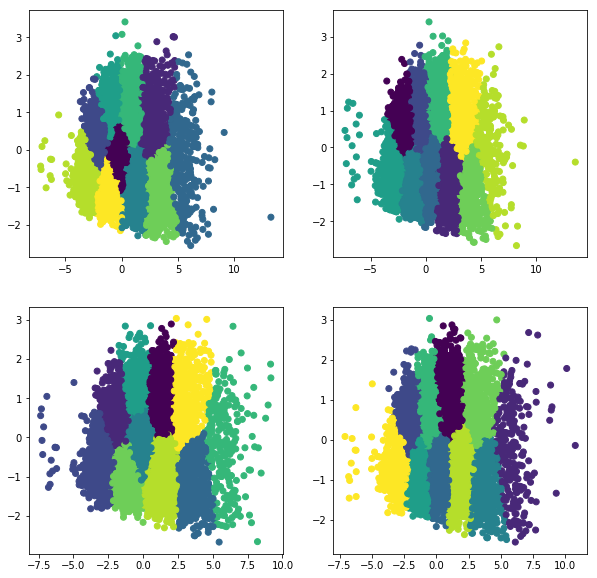

In [74]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
samples = 4
for n_c in n_clusters:
    print("Clusters: ", n_c)
    plt.figure(figsize=(10,10))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
    axs = [ax1, ax2, ax3, ax4]
    scores = []
    means = []
    medians = []
    stds = []
    for ax in axs:
        pca_df_samp = pca_df.sample(frac=0.25)
        kmeans = KMeans(n_clusters=n_c, random_state=42).fit(pca_df_samp)
        y_pred = kmeans.predict(pca_df_samp)
        ax.scatter(pca_df_samp[0], pca_df_samp[1], c=y_pred)
        scores.append(metrics.calinski_harabaz_score(pca_df_samp, kmeans.labels_))
        means.append((pca_df_samp[0].mean(), pca_df_samp[1].mean()))
        medians.append((pca_df_samp[0].median(), pca_df_samp[1].median()))
        stds.append((pca_df_samp[0].std(), pca_df_samp[1].std()))
    print("Score: ", np.mean(scores))
    means, stds, medians = np.array(means), np.array(stds), np.array(medians)
    print()
    print("Cross Sample Comparisons")
    print("------------------------")
    print("First Component")
    print("Means Deviation:   ", means[:, 0].std())
    print("Medians Deviation: ", medians[:, 0].std())
    print("Stds Deviation:    ", stds[:, 0].std())
    print("Second Component")
    print("Means Deviation:   ", means[:, 1].std())
    print("Medians Deviation: ", medians[:, 1].std())
    print("Stds Deviation:    ", stds[:, 1].std())    
    print()

In [77]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
samples = 20
c1_deviation = []
c2_deviation = []
for n_c in n_clusters:
    print("Clusters: ", n_c)
    scores = []
    means = []
    medians = []
    stds = []
    for sample in range(samples):
        pca_df_samp = pca_df.sample(frac=0.25)
        kmeans = KMeans(n_clusters=n_c, random_state=42).fit(pca_df_samp)
        y_pred = kmeans.predict(pca_df_samp)
        scores.append(metrics.calinski_harabaz_score(pca_df_samp, kmeans.labels_))
        means.append((pca_df_samp[0].mean(), pca_df_samp[1].mean()))
        medians.append((pca_df_samp[0].median(), pca_df_samp[1].median()))
        stds.append((pca_df_samp[0].std(), pca_df_samp[1].std()))
    print("Score: ", np.mean(scores))
    means, stds, medians = np.array(means), np.array(stds), np.array(medians)
    print()
    print("Cross Sample Comparisons")
    print("------------------------")
    print("First Component")
    print("Means Deviation:   ", means[:, 0].std())
    print("Medians Deviation: ", medians[:, 0].std())
    print("Stds Deviation:    ", stds[:, 0].std())
    c1_deviation.append((means[:, 0].std(), medians[:, 0].std(),
                            stds[:, 0].std()))
    print("Second Component")
    print("Means Deviation:   ", means[:, 1].std())
    print("Medians Deviation: ", medians[:, 1].std())
    print("Stds Deviation:    ", stds[:, 1].std())  
    c2_deviation.append((means[:, 1].std(), medians[:, 1].std(),
                        stds[:, 1].std()))
    print()

c1_deviation = np.array(c1_deviation)
c2_deviation = np.array(c2_deviation)

Clusters:  2
Score:  9919.523090163038

Cross Sample Comparisons
------------------------
First Component
Means Deviation:    0.01810197446608567
Medians Deviation:  0.021613718717761066
Stds Deviation:     0.023552816748169742
Second Component
Means Deviation:    0.009172960997240413
Medians Deviation:  0.010513871920124077
Stds Deviation:     0.004261968581500117

Clusters:  3
Score:  9233.08238810711

Cross Sample Comparisons
------------------------
First Component
Means Deviation:    0.014545100808721552
Medians Deviation:  0.019570654169121314
Stds Deviation:     0.013929481868819853
Second Component
Means Deviation:    0.011430741292685146
Medians Deviation:  0.014343240165314911
Stds Deviation:     0.006196839278633914

Clusters:  4
Score:  8390.44167960688

Cross Sample Comparisons
------------------------
First Component
Means Deviation:    0.015307628809812443
Medians Deviation:  0.021517203797678647
Stds Deviation:     0.01922968148075499
Second Component
Means Deviation:  

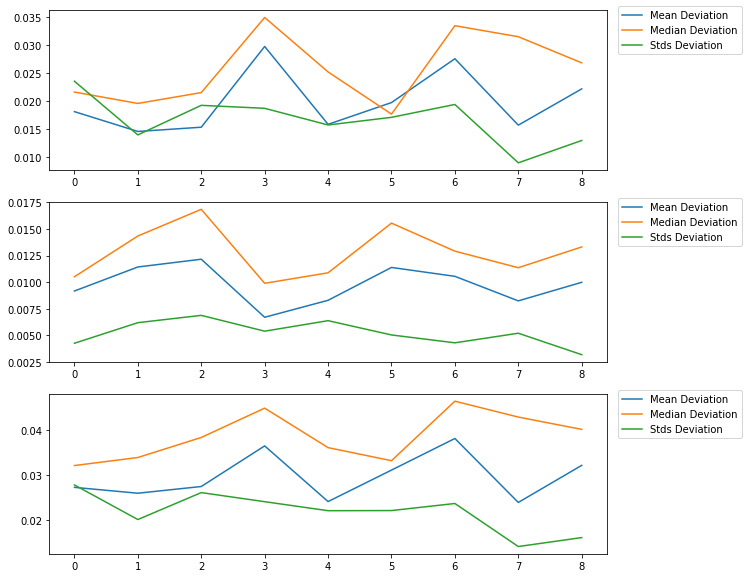

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(10,10))
plt.subplot(311)
plt.plot(c1_deviation[:, 0], label="Mean Deviation")
plt.plot(c1_deviation[:, 1], label="Median Deviation")
plt.plot(c1_deviation[:, 2], label="Stds Deviation")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.055))
plt.subplot(312)
plt.plot(c2_deviation[:, 0], label="Mean Deviation")
plt.plot(c2_deviation[:, 1], label="Median Deviation")
plt.plot(c2_deviation[:, 2], label="Stds Deviation")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.055))
plt.subplot(313)
plt.plot((c1_deviation+c2_deviation)[:, 0], label="Mean Deviation")
plt.plot((c1_deviation+c2_deviation)[:, 1], label="Median Deviation")
plt.plot((c1_deviation+c2_deviation)[:, 2], label="Stds Deviation")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.055))

In [ ]:
def eval_cluster_model(model, samples=5):
    c1_deviation = []
    c2_deviation = []
    scores = []
    means = []
    medians = []
    stds = []
    for sample in range(samples):
        pca_df_samp = pca_df.sample(frac=0.25)
        model.fit(pca_df_samp)
        scores.append(metrics.calinski_harabaz_score(pca_df_samp, model.labels_))
        means.append((pca_df_samp[0].mean(), pca_df_samp[1].mean()))
        medians.append((pca_df_samp[0].median(), pca_df_samp[1].median()))
        stds.append((pca_df_samp[0].std(), pca_df_samp[1].std()))
    print("Score: ", np.mean(scores))
    means, stds, medians = np.array(means), np.array(stds), np.array(medians)
    print()
    print("Cross Sample Comparisons")
    print("------------------------")
    print("First Component")
    print("Means Deviation:   ", means[:, 0].std())
    print("Medians Deviation: ", medians[:, 0].std())
    print("Stds Deviation:    ", stds[:, 0].std())
    c1_deviation.append((means[:, 0].std(), medians[:, 0].std(),
                            stds[:, 0].std()))
    print("Second Component")
    print("Means Deviation:   ", means[:, 1].std())
    print("Medians Deviation: ", medians[:, 1].std())
    print("Stds Deviation:    ", stds[:, 1].std())  
    c2_deviation.append((means[:, 1].std(), medians[:, 1].std(),
                        stds[:, 1].std()))
    print()

    c1_deviation = np.array(c1_deviation)
    c2_deviation = np.array(c2_deviation)
    
    return c1_deviation, c2_deviation, model

In [1]:
bandwidth = estimate_bandwidth(pca_df, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
eval_cluster_model(ms, samples=1)

NameError: name 'estimate_bandwidth' is not defined